In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (169 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!pip install pdf2image
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 16 kB/s 
     |████████████████████████████████| 47.6 MB 1.3 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [ ]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
file_names= ['/content/drive/MyDrive/Court Cases/26 - Oil___Natural_Gas_Corporation_Ltd_vs_Saw_Pipes_Ltd.PDF',
             '/content/drive/MyDrive/Court Cases/261. Gail_(India)_Limited_vs_Vrc_Construction_(India)_Pvt._Ltd_on_4_July,_2019.PDF',
             '/content/drive/MyDrive/Court Cases/262. M_S._National_Highways_Authority_..._vs_M_S._Hcc_Ltd._on_8_July,_2014.PDF',
             '/content/drive/MyDrive/Court Cases/269. National_Highways_Authority_Of_..._vs_Ssangyong_Engineering___..._on_16_March,_2018.PDF',
             '/content/drive/MyDrive/Court Cases/27 - M_S_National_Highways_Authority_..._vs_M_S_Bscpl_on_17_December,_2014.PDF',
             '/content/drive/MyDrive/Court Cases/274. M_S._Konkan_Railway_Corporation_..._vs_M_S._Rani_Construction_Pvt._Ltd_on_30_January,_2002.PDF',
             '/content/drive/MyDrive/Court Cases/275. Konkan_Railway_Corpn._Ltd.___Ors_vs_M_S._Mehul_Construction_Co_on_21_August,_2000.PDF',
             '/content/drive/MyDrive/Court Cases/28. --- Airports_Authority_Of_India_vs_M_S_Sikka_Associates_on_20_February,_2018.PDF',
             '/content/drive/MyDrive/Court Cases/281. Indian_Farmers_Fertiliser_..._vs_M_S._Duggal_Constructions_..._on_23_December,_2011.PDF',
             '/content/drive/MyDrive/Court Cases/282. National_Highways_Authority_Of_..._vs_M_S_Kmc-Rk-Sd_(Jv)_on_22_October,_2013.PDF',
             '/content/drive/MyDrive/Court Cases/283. Delhi_Jal_Board_vs_M_S_Kaveri_Infrastructure_Pvt._..._on_29_November,_2013.PDF',
             '/content/drive/MyDrive/Court Cases/284. Gail_(India)_Ltd._vs_Osram_India_Pvt_Ltd._on_9_March,_2017.PDF',
             '/content/drive/MyDrive/Court Cases/289. Ennore_Port_Limited_vs_Hindustan_Construction_Company_..._on_22_August,_2005.PDF',
             '/content/drive/MyDrive/Court Cases/29 - Project_Director_vs_M_S.Rns_Infrastructure_Ltd_Gpl_..._on_8_February,_2017.PDF',
             '/content/drive/MyDrive/Court Cases/291. Tirunelveli_City_Municipal_..._vs_M_S._Sri_Pathy_Associates_on_26_September,_2011.PDF',
             '/content/drive/MyDrive/Court Cases/294. Executive_Engineer_Cd-Ii,_Ncet_Of_..._vs_Shri_Syam_Lal_Government_..._on_22_September,_2011.PDF',
             '/content/drive/MyDrive/Court Cases/296. The_Chief_Engineer_vs_M_S._Amudha_Engineer_Co._on_1_October,_2004.PDF',
             '/content/drive/MyDrive/Court Cases/297. Gas_Authority_Of_India_Ltd._vs_Thermax_Ltd___Anr._on_30_April,_2010.PDF',
             '/content/drive/MyDrive/Court Cases/299. -----Oil_Industry_Development_Board_vs_Godrej___Boyce_Mfg_Co_Ltd_on_16_September,_2019.PDF',
             '/content/drive/MyDrive/Court Cases/30 ----- Union_Of_India_(Uoi WON CASE)_And_Anr._vs_J.G._Engineers_Pvt._Ltd.PDF',
             '/content/drive/MyDrive/Court Cases/300. Union_Of_India_vs_M_S._R.S._Sharma_Contractor_Pvt._..._on_5_March,_2010.PDF',
             '/content/drive/MyDrive/Court Cases/303. -----Delhi_Development_Authority_vs_M_S_S_S_Jetely_on_7_March,_2011.PDF',
             '/content/drive/MyDrive/Court Cases/306. National_Thermal_Power_..._vs_Wig_Brothers_Builders_And_..._on_17_April,_2009.PDF',
             '/content/drive/MyDrive/Court Cases/308. Union_Of_India_vs_Pradeep_Vinod_Construction_Co._on_14_November,_2019.PDF',
             '/content/drive/MyDrive/Court Cases/310. -----Delhi_Metro_Rail_Corporation_Ltd_vs_Voestalpine_Schine_Gmbh_on_13_March,_2018.PDF',
             '/content/drive/MyDrive/Court Cases/315. Union_Of_India_vs_Varindera_Constructions_Ltd._..._on_19_April,_2018.PDF',
             '/content/drive/MyDrive/Court Cases/318. M_S_National_Highways_Authority_..._vs_M_S_Pcl-Stico_(Jv)_on_6_August,_2018.PDF',
             '/content/drive/MyDrive/Court Cases/319. M_S_Chennai-Ennore_Port_Road_..._vs_M_S_Rds_Project_Ltd._on_15_March,_2016.PDF',
             '/content/drive/MyDrive/Court Cases/321. National_Highways_Authority_Of_..._vs_Prakash_Atlanta_Jv_on_8_November,_2016.PDF',
             '/content/drive/MyDrive/Court Cases/323. Indian_Oil_Corporation_Ltd._vs_Lloyds_Steel_Industries_on_15_October,_2009.PDF',
             '/content/drive/MyDrive/Court Cases/324. Indian_Oil_Corporation_vs_Lloyds_Steel_Industries_Ltd._on_31_August,_2007.PDF',
             '/content/drive/MyDrive/Court Cases/325. The_State_Of_Jharkhand_vs_M_S_Hss_Integrated_Sdn_on_18_October,_2019.PDF',
             '/content/drive/MyDrive/Court Cases/329. Indian_Oil_Corporation_Limited._vs_Toyo_Engineering_Corporation___..._on_6_March,_2020.PDF',
             '/content/drive/MyDrive/Court Cases/330. Indian_Oil_Corporation_Ltd_vs_Larsen___Toubro_Limited_on_1_June,_2018.PDF',
             '/content/drive/MyDrive/Court Cases/331. Ircon_International_Limited_vs_C.R._Sons_Builders_And_Developers_..._on_11_February,_2020.PDF',
             '/content/drive/MyDrive/Court Cases/334. Union_Of_India_vs_M_S_Prominent_Builders_on_18_February,_2020.PDF',
             '/content/drive/MyDrive/Court Cases/336. Gujarat_Maritime_Board_vs_L_T__Infrastructure_Development_..._on_28_September,_2016.PDF',
             '/content/drive/MyDrive/Court Cases/338. National_Buildings_..._vs_J._R._Constructions_on_30_July,_2019.PDF',
             '/content/drive/MyDrive/Court Cases/34 - M_S.Indian_Oil_Corporation_Ltd_vs_M_S.Fabtech_Works.PDF',
             '/content/drive/MyDrive/Court Cases/341. Bihar_State_Mineral_Dev._Corpn.___..._vs_Encon_Builders_(I)_Pvt._Ltd_on_21_August,_2003.PDF',
             '/content/drive/MyDrive/Court Cases/343. The_Kolhapur_Municipal_..._vs_Fairdeal_Construction_on_15_October,_2019.PDF']
             

In [ ]:
#images = convert_from_path('/content/344. The_Assam_State_Electricity_Board_..._vs_Buildworth_Pvt._Ltd._Represented_..._on_4_July,_2017.PDF')

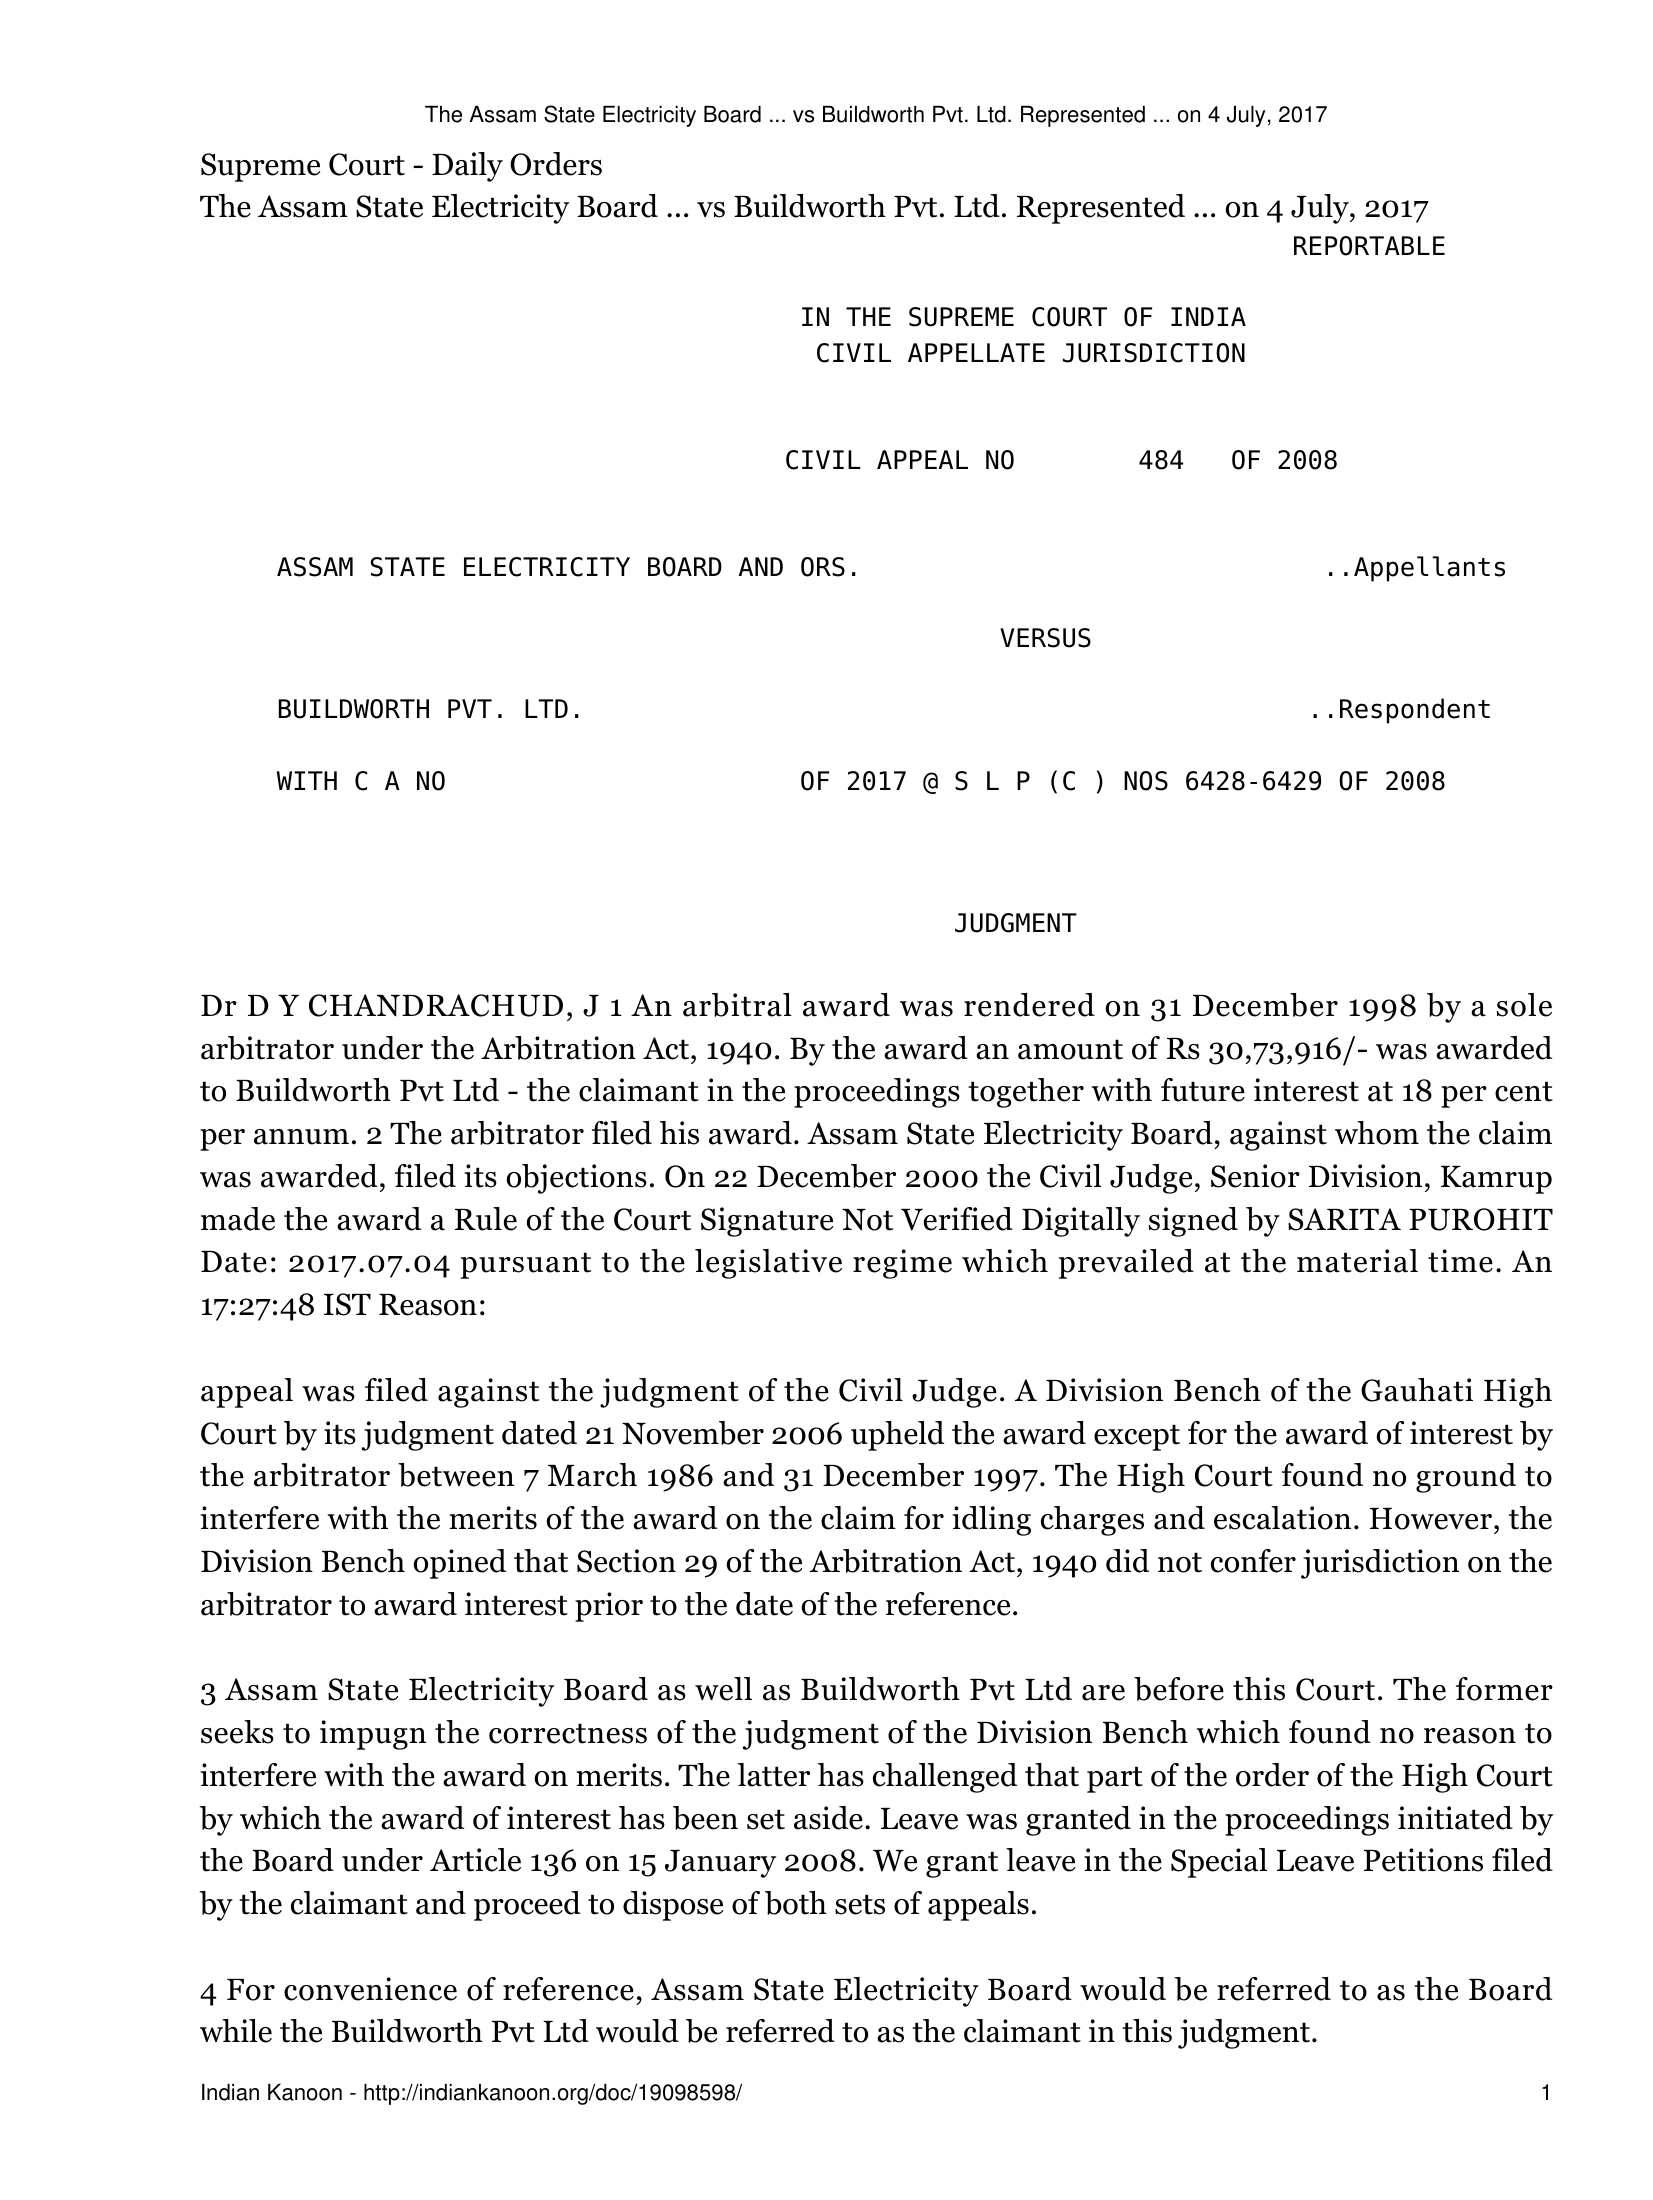

In [ ]:
#from IPython.display import display, Image
#display(images[0])

In [ ]:
#bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8, decoder='beamsearch', beamWidth=10)
#bounds

[([[422, 100], [766, 100], [766, 129], [422, 129]],
  'The Assam State Electricity Board',
  0.8790280334743266),
 ([[790, 102], [1150, 102], [1150, 130], [790, 130]],
  'vs Buildworth Pvt. Ltd. Represented',
  0.5097423322599616),
 ([[1174, 101], [1330, 101], [1330, 131], [1174, 131]],
  'on 4 July, 2017',
  0.7388256405857144),
 ([[195, 147], [609, 147], [609, 190], [195, 190]],
  'Supreme Court - Daily Orders',
  0.9313359587210591),
 ([[197, 189], [665, 189], [665, 229], [197, 229]],
  'The Assam State Electricity Board',
  0.8634581181200119),
 ([[695, 188], [1191, 188], [1191, 229], [695, 229]],
  'vs Buildworth Pvt: Ltd. Represented',
  0.9392328591921275),
 ([[1221, 191], [1433, 191], [1433, 229], [1221, 229]],
  'on 4 July, 2017',
  0.7859478215038328),
 ([[1290, 232], [1450, 232], [1450, 262], [1290, 262]],
  'REPORTABLE',
  0.9999523122707423),
 ([[798, 302], [1248, 302], [1248, 332], [798, 332]],
  'IN THE SUPREME COURT OF INDIA',
  0.5239303344506552),
 ([[812, 337], [1249

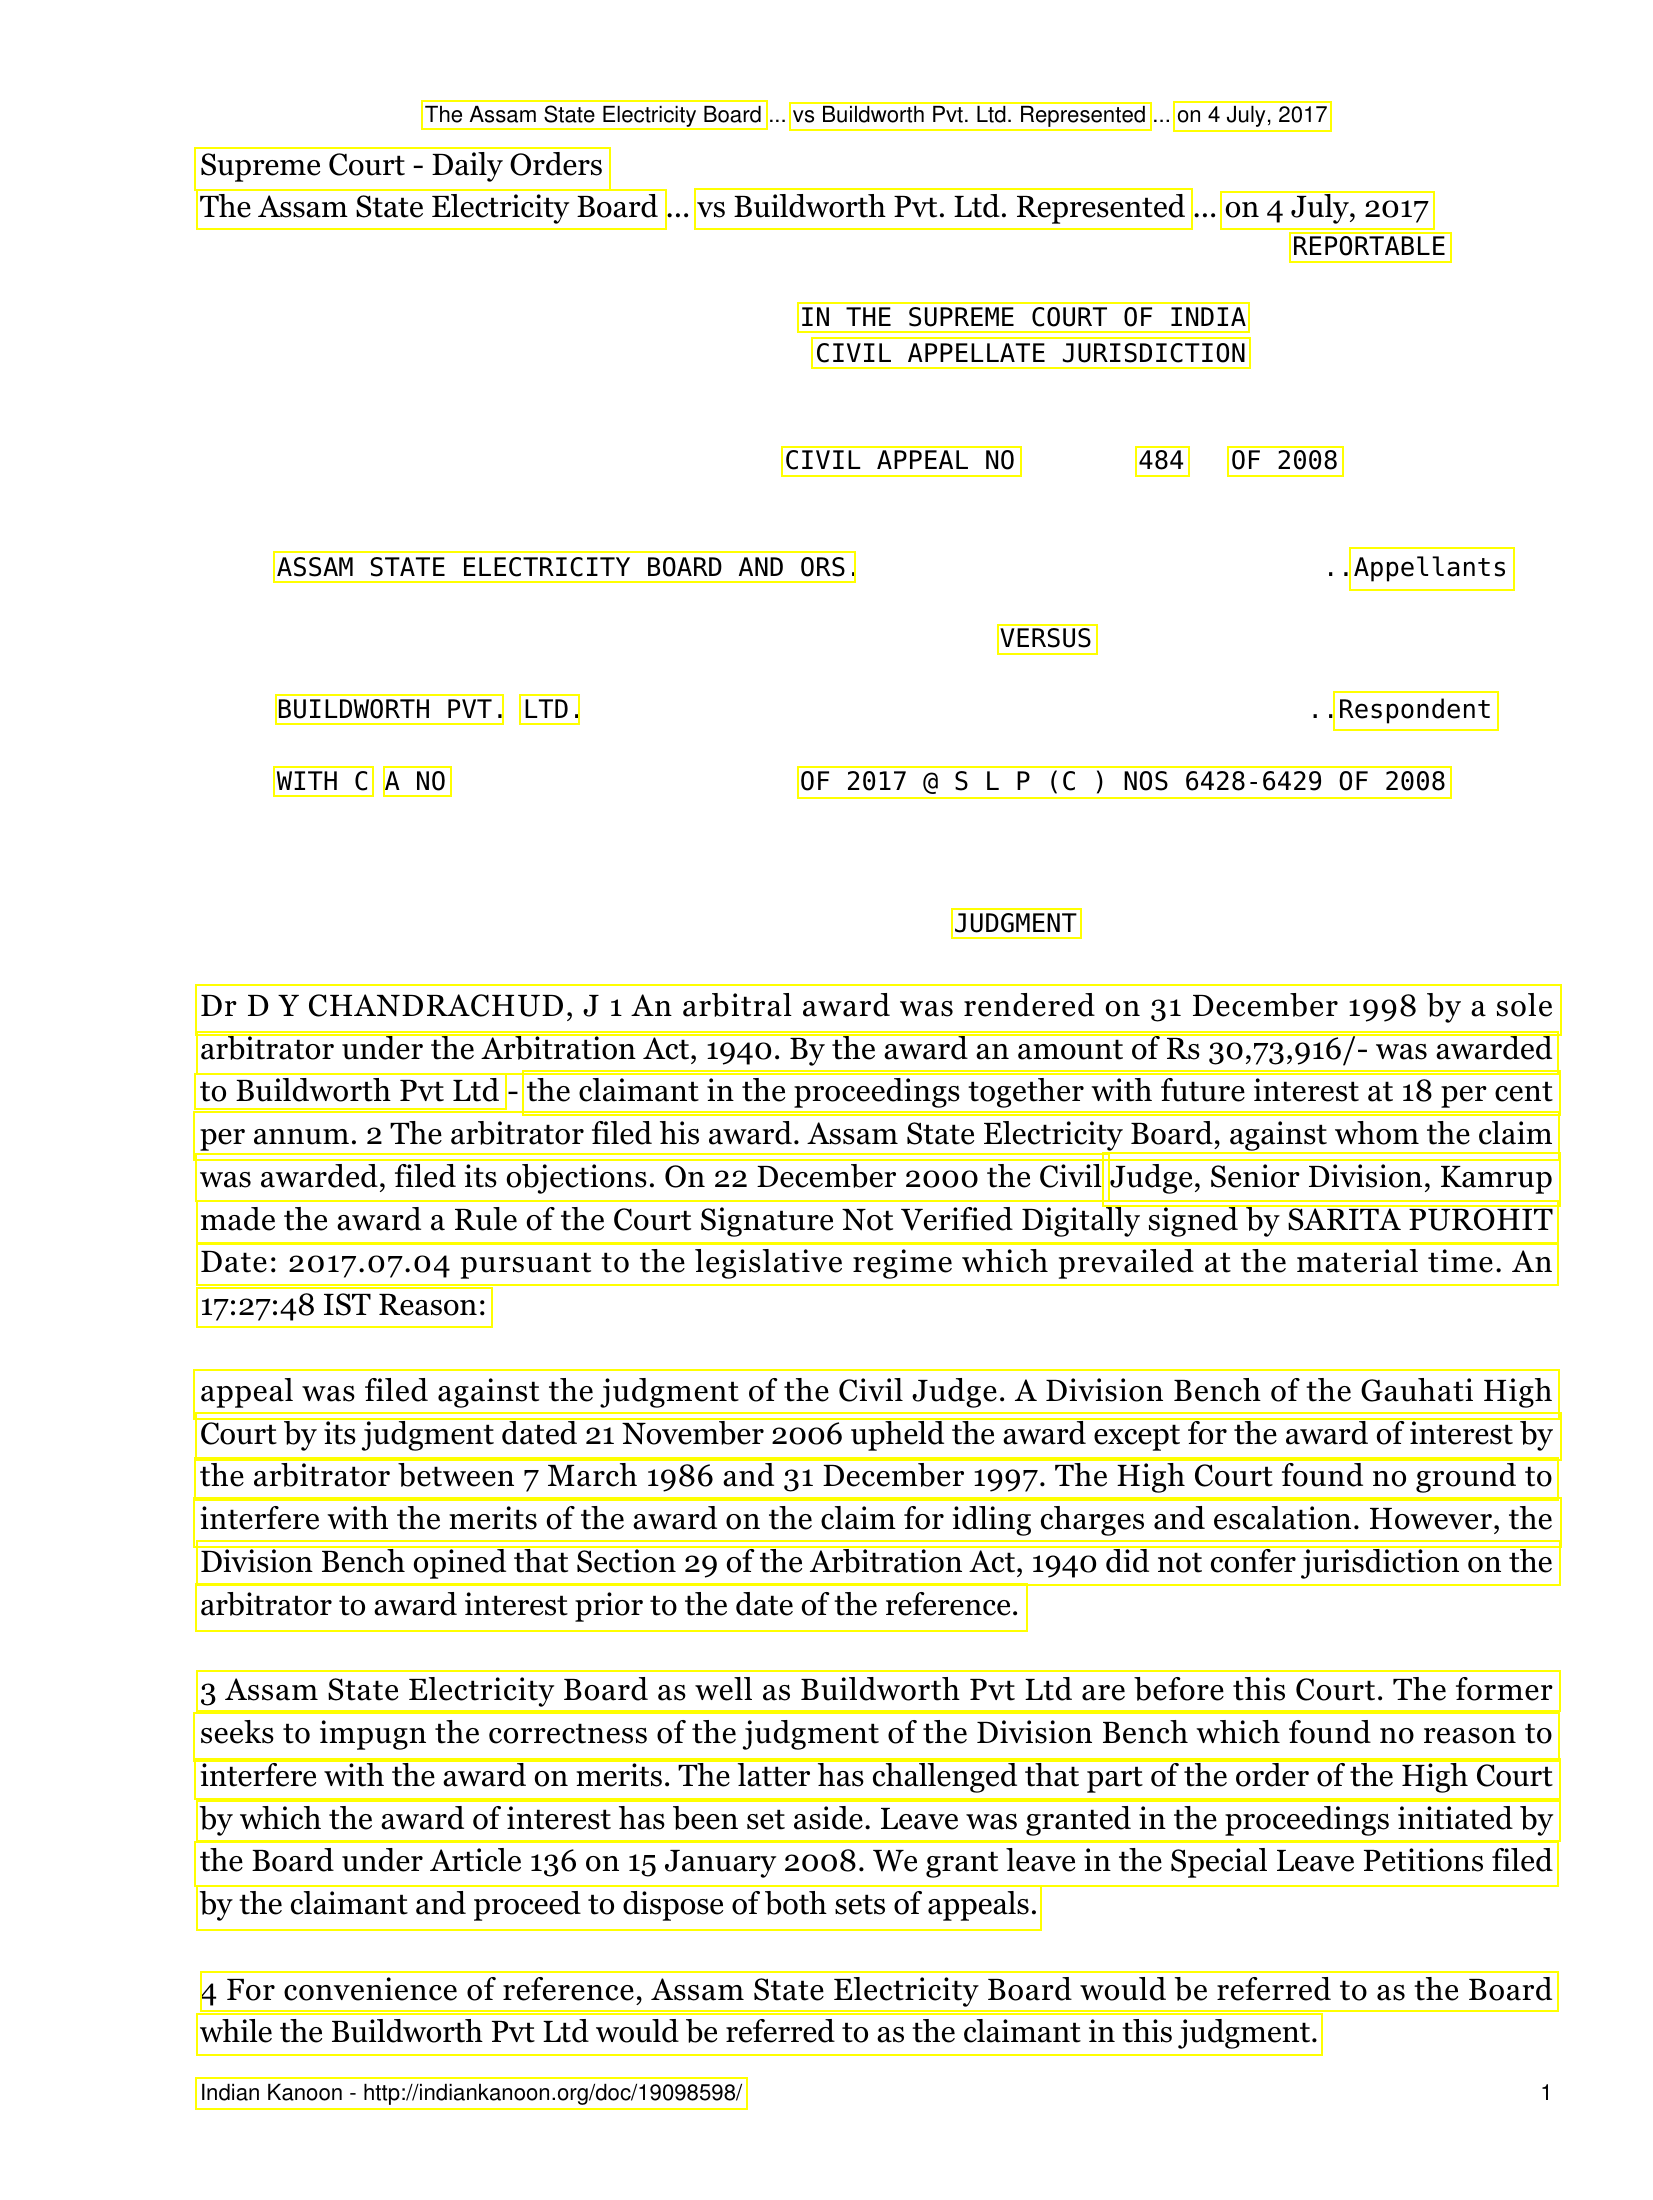

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
  draw= ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image

draw_boxes(images[0], bounds)   

In [ ]:

text = ''  
for i in range(len(bounds)):

  text = text + bounds[i][1] + '\n'
    #text_list.append(text)
print(text)
  
  

The Assam State Electricity Board
vs Buildworth Pvt. Ltd. Represented
on 4 July, 2017
Supreme Court - Daily Orders
The Assam State Electricity Board
vs Buildworth Pvt: Ltd. Represented
on 4 July, 2017
REPORTABLE
IN THE SUPREME COURT OF INDIA
CIVIL APPELLATE JURISDICTION
CIVIL APPEAL NO
484
OF 2008
ASSAM STATE ELECTRICITY BOARD AND ORS _
Appellants
VERSUS
BUILDWORTH PVT .
LTD .
Respondent
WITH €
A NO
OF 2017 @ 5 L P (C ) NOS 6428-6429 OF 2008
JUDGMENT
Dr D Y CHANDRACHUD, J 1 An arbitral award was rendered on 31 December 1998 by a sole
arbitrator under the Arbitration Act; 1940. By the award an amount of Rs 30,73,916/- was awarded
to Buildworth Pvt Ltd
the claimant in the proceedings together with future interest at 18 per cent
per annum. 2 The arbitrator filed his award. Assam State Electricity Board, against whom the claim
was awarded, filed its objections. On 22 December 2000 the Civil
Judge, Senior Division, Kamrup
made the award a Rule of the Court Signature Not Verified Digitally s

In [ ]:
with open(r'ASSAM case.txt', 'w') as fp:
    fp.write("%s\n" % text)


In [ ]:

all_images = []
for i in range(len(file_names)):
  all_images.append(convert_from_path(file_names[i]))


In [ ]:
all_images

[[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2200 at 0x7F3022BB2A90>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2200 at 0x7F3022BB2910>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2200 at 0x7F3022BB2C90>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2200 at 0x7F3023492D90>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2200 at 0x7F3022BBC6D0>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2200 at 0x7F3022BC6D50>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2200 at 0x7F3022B4F190>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2200 at 0x7F3022B4F310>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2200 at 0x7F3022B4F790>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2200 at 0x7F3022BBC810>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2200 at 0x7F3022B4F7D0>,
  <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2200 

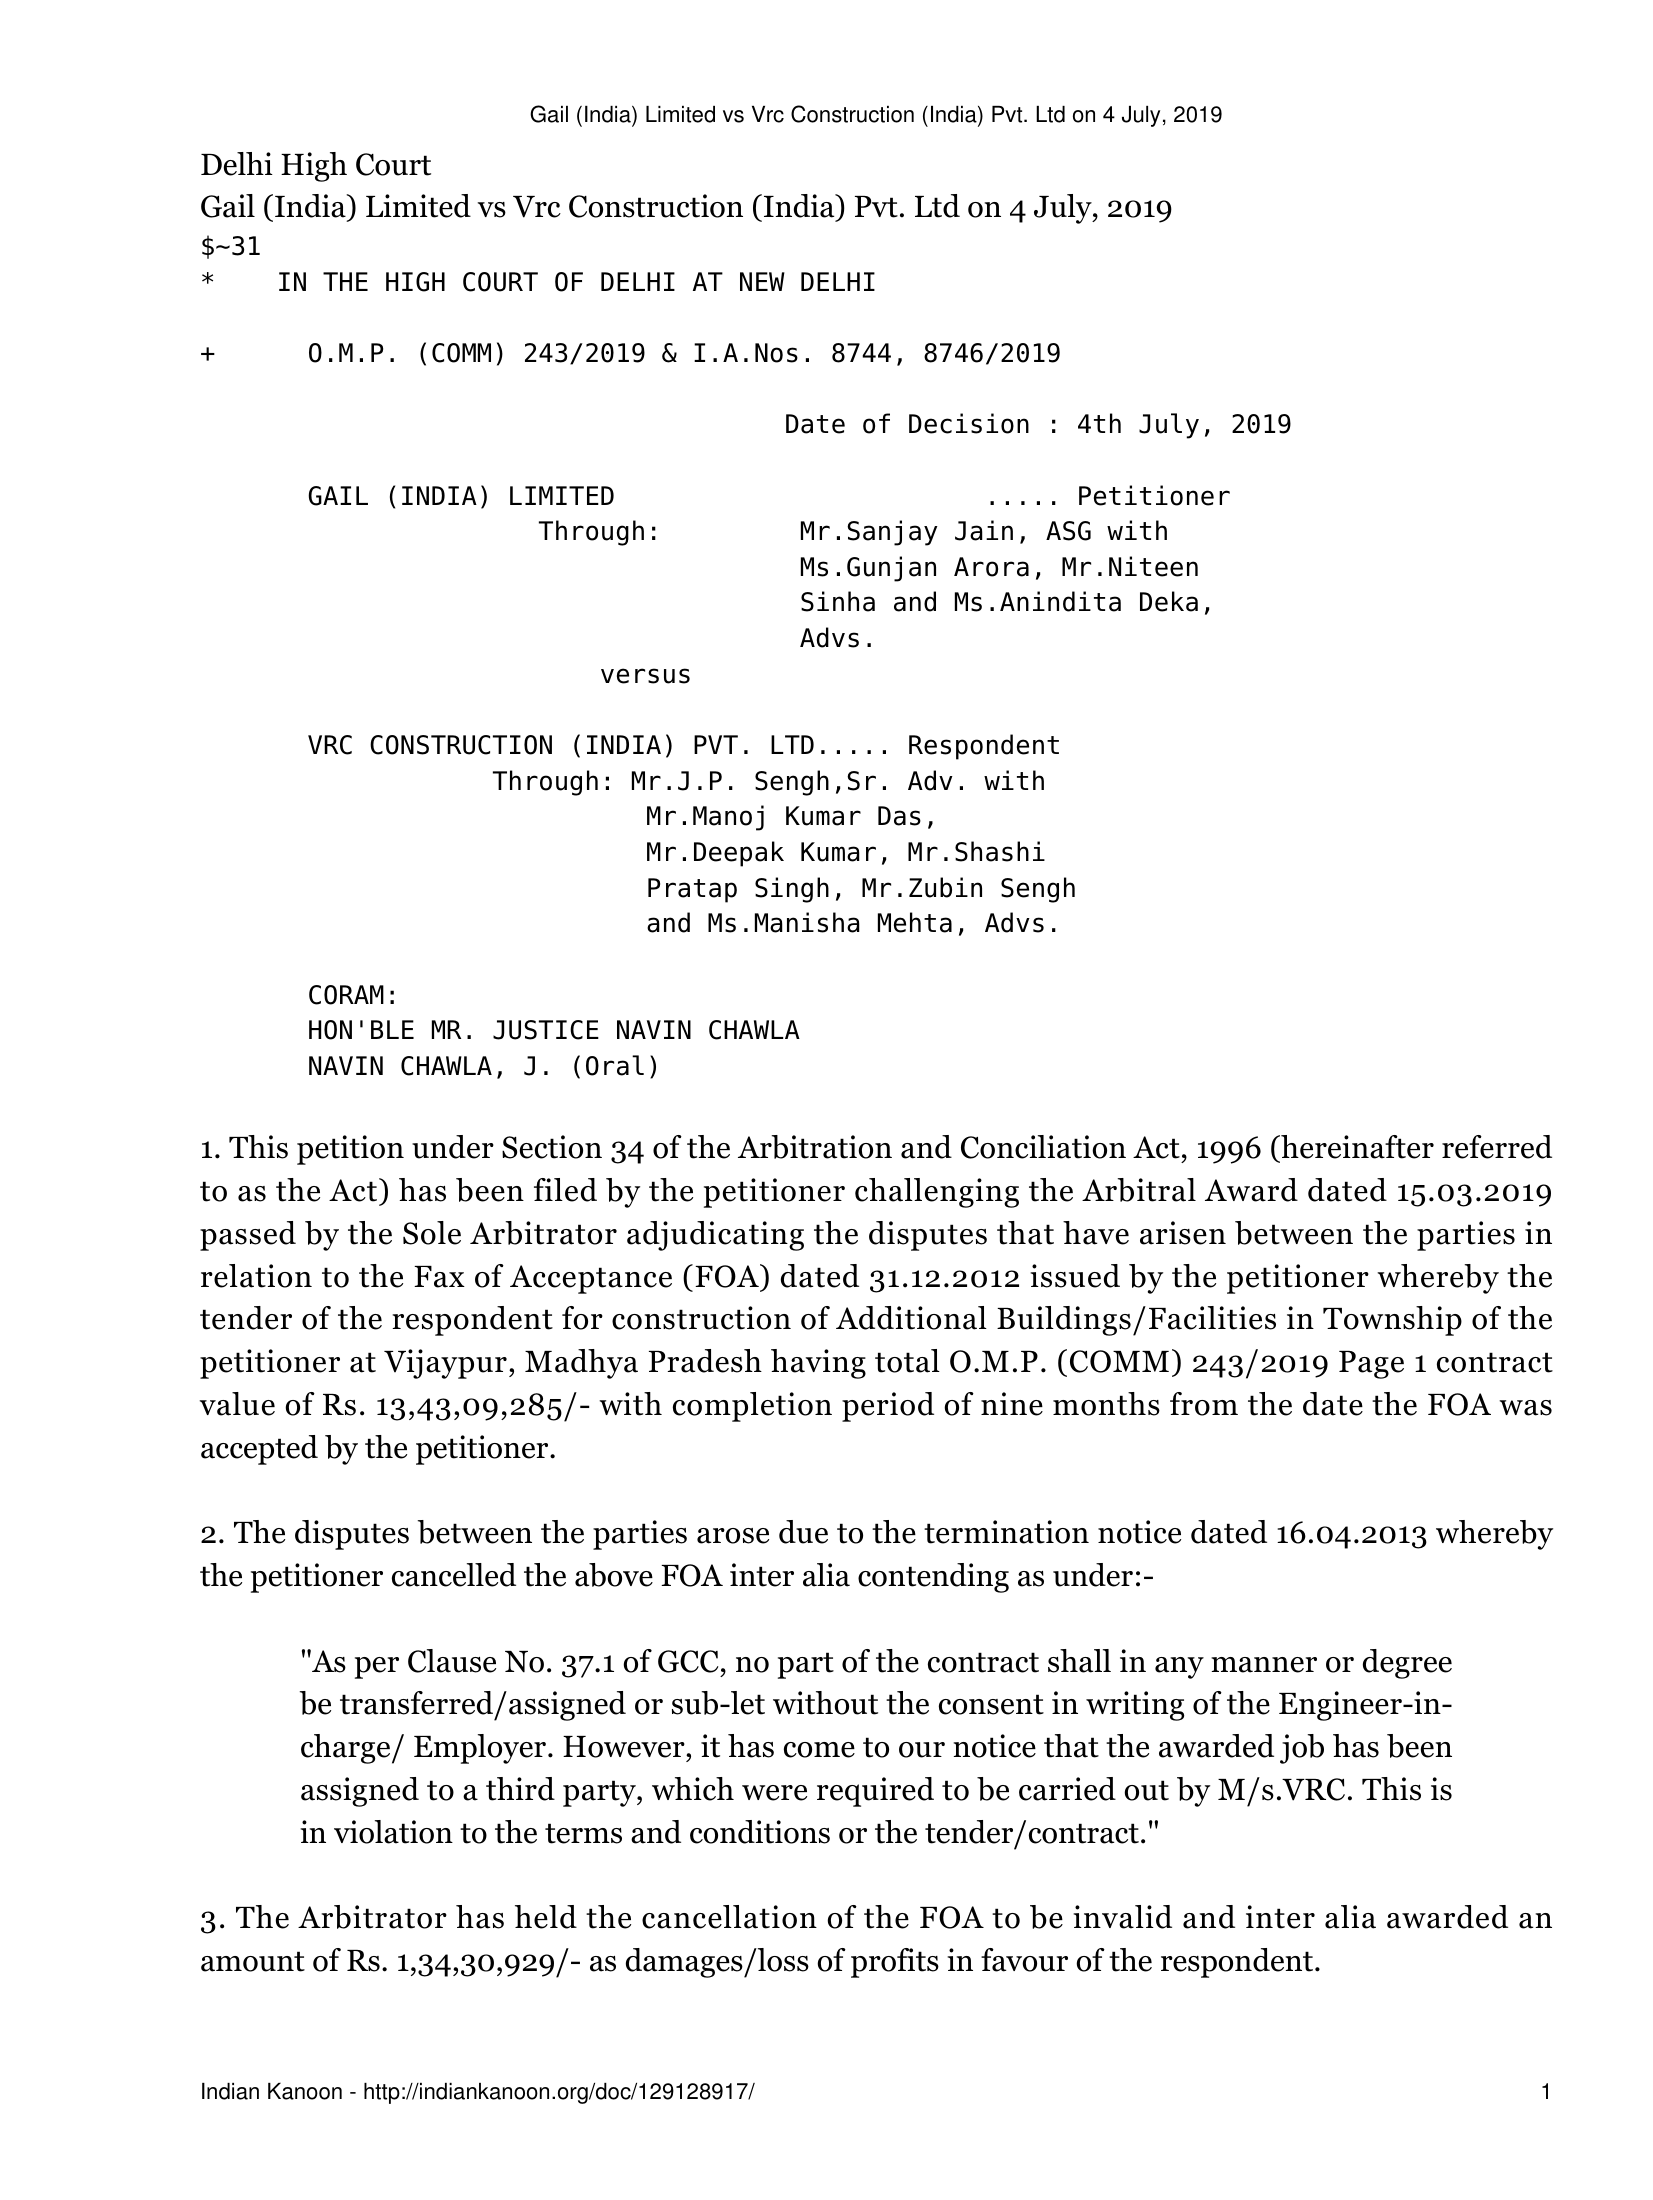

In [ ]:
from IPython.display import display, Image
display(all_images[1][0])

In [ ]:
bounds = []
for i in range(len(file_names)):
  bounds.append(reader.readtext(np.array(all_images[i][0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8, decoder='beamsearch', beamWidth=10 ))

In [ ]:
bounds

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
  draw= ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image

#draw_boxes(all_images[0], bounds)   

In [ ]:
draw_boxes(all_images[0], bounds)   

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
  draw= ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image

draw_boxes(images[0], bounds)   

AttributeError: ignored

In [ ]:
bounds[0][0][1]

'MS. Konkan Railway Corporation'

In [ ]:
final_text_data = []
for j in range(len(file_names)):
  #text_list = []
  text = ''  
  for i in range(len(bounds[j])):
  #text=''
    text = text + bounds[j][i][1] + '\n'
    #text_list.append(text)
  print(text)
  final_text_data.append(text)
  print('\n\n\n\n\n')


Oil & Natural Gas Corporation Ltd vs Saw Pipes Ltd on 17 April; 2003
Supreme Court of India
Oil & Natural Gas Corporation Ltd vs Saw Pipes Ltd on 17 April, 2003
Author: Shah
Bench: M.B. Shah, Arun Kumar:
CASE NO _
Appeal (civil)
7419
2001
of 518
PETITIONER:
Oil & Natural Gas Corporation Ltd.
RESPONDENT =
SAW Pipes Ltd.
DATE OF JUDGMENT: 17/04/2003
BENCH:
M.B
SHAH
ARUN KUMAR.
JUDGMENT =
JUDG MENT Shah, J.
COURT'S JURISDICTION UNDER SECTION 34 OF THE ARBITRATION AND CONCILIATION
ACT, 1966 Before dealing with the issues involved in this appeal, we would first decide the main
point in controversy, namely
the ambit and scope of Court's jurisdiction in case where award
passed by the Arbitral Tribunal is challenged under Section 34 of the Arbitration and Conciliation
Act, 1996 (hereinafter referred to as "the Act") as the decision in this appeal would depend upon the
said finding: In other words
whether the Court would have jurisdiction under Section 34 of the Act
to set aside an award passed

In [ ]:
len(final_text_data)

41

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open(r'OCR_TEXT_DATA.txt', 'w') as fp:
    for item in final_text_data:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [ ]:
textfile_names = ['T67.txt', 'T68.txt', 'T69.txt', 'T70.txt', 'T71.txt', 'T72.txt','T73.txt','T74.txt','T75.txt','T76.txt','T77.txt','T78.txt','T79.txt','T80.txt','T81.txt','T82.txt',
                  'T83.txt','T84.txt','T85.txt','T86.txt','T187.txt','T188.txt','T189.txt','T190.txt','T191.txt','T192.txt','T193.txt','T194.txt','T195.txt',
                  'T196.txt','T197.txt','T198.txt','T199.txt','T1100.txt','T1101.txt','T1102.txt','T1103.txt','T1104.txt','T1105.txt','T1106.txt','T1107.txt']

In [ ]:
for i in range(len(file_names)):
  with open(textfile_names[i], 'w') as fp:
      #for item in final_text_data:
        # write each item on a new line
         # fp.write("%s\n" % item)
      fp.write(final_text_data[i])    
      print('Done')

Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


In [ ]:
nlp= spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(text)

In [ ]:
from spacy import displacy
displacy.render(nlp(doc.text), style='ent', jupyter=True)